# QFT

In [132]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.circuit.library import QFT
from qiskit import transpile
from qiskit_aer import AerSimulator

simulator=AerSimulator()

In [133]:
import numpy as np

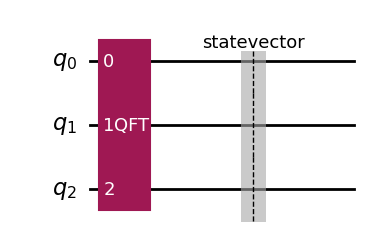

In [134]:
n=3
qc_QFT = QuantumCircuit(n)
qc_QFT.append(QFT(n), range(n))
qc_QFT.save_statevector()
qc_QFT.draw('mpl',filename='../images/QFT.png')

In [135]:
results_QFT = simulator.run(transpile(qc_QFT,simulator)).result()
psi=results_QFT.get_statevector()
psi.draw('latex', prefix='{\\ket{\\psi} = }')

<IPython.core.display.Latex object>

NOte that in case of Qiskit because the notation is Little Endian, the qubits are reversed. So, the qubit 0 is the last one in the list and thus we implement the QFT as show in the figure

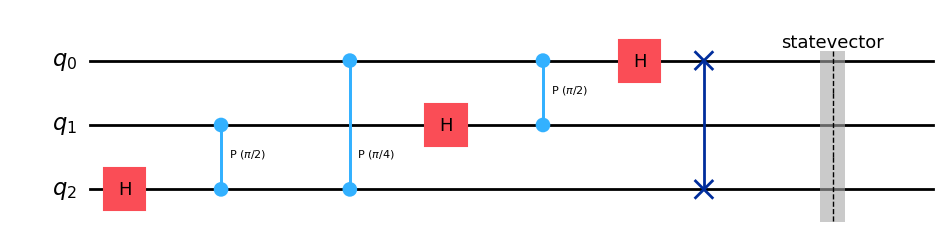

In [136]:
def QFT_custom(n):
    qc_QFT_custom = QuantumCircuit(n, name='QFT')
    for i in range(n-1,-1,-1):
        qc_QFT_custom.h(i)
        for j in range(i-1,-1,-1):
            qc_QFT_custom.cp(np.pi/2**(i-j),j,i)

    for i in range(n//2):
        qc_QFT_custom.swap(i,n-i-1)

    return qc_QFT_custom

#qc_QFT_custom = QuantumCircuit(n)
#qc_QFT_custom.append(QFT_custom(n), range(n))
qc_QFT_custom = QFT_custom(n)
qc_QFT_custom.save_statevector()
# save it in images folder
qc_QFT_custom.draw('mpl', filename='../images/qft_custom.png')


In [137]:
qc_transpiled= transpile(qc_QFT_custom,simulator)
result = simulator.run(transpile(qc_QFT_custom,simulator)).result()
psi_custom = result.get_statevector()
psi_custom.draw('latex', prefix='{\\ket{\\psi} = }')

<IPython.core.display.Latex object>

In [138]:
QFT_matrix = qi.Operator(QFT(n))
print(QFT_matrix.data)

[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          2.50000000e-01+0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01+0.25j
  -3.53553391e-01+0.j         -2.50000000e-01-0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j
   3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j]
 [ 3.53553391e-01+0.j         -2.50000000e-01+0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01+0.25j
  -3.53553391e-01+0.j          2.50000000e-01-0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j       

In [139]:
custom_QFT_matrix = qi.Operator(QFT_custom(n))
print(custom_QFT_matrix.data)

[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          2.50000000e-01+0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01+0.25j
  -3.53553391e-01+0.j         -2.50000000e-01-0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j
   3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j]
 [ 3.53553391e-01+0.j         -2.50000000e-01+0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01+0.25j
  -3.53553391e-01+0.j          2.50000000e-01-0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j       

In [140]:
def QFT_dagger_matrix(n):
    QFT_dagger_matrix = qi.Operator(QFT(n).inverse())
    return QFT_dagger_matrix.data

QFT_dagger_matrix(n)

array([[ 3.53553391e-01+0.j        ,  3.53553391e-01+0.j        ,
         3.53553391e-01+0.j        ,  3.53553391e-01+0.j        ,
         3.53553391e-01+0.j        ,  3.53553391e-01+0.j        ,
         3.53553391e-01+0.j        ,  3.53553391e-01+0.j        ],
       [ 3.53553391e-01+0.j        ,  2.50000000e-01-0.25j      ,
         2.16489014e-17-0.35355339j, -2.50000000e-01-0.25j      ,
        -3.53553391e-01+0.j        , -2.50000000e-01+0.25j      ,
        -2.16489014e-17+0.35355339j,  2.50000000e-01+0.25j      ],
       [ 3.53553391e-01+0.j        ,  2.16489014e-17-0.35355339j,
        -3.53553391e-01+0.j        , -2.16489014e-17+0.35355339j,
         3.53553391e-01+0.j        ,  2.16489014e-17-0.35355339j,
        -3.53553391e-01+0.j        , -2.16489014e-17+0.35355339j],
       [ 3.53553391e-01+0.j        , -2.50000000e-01-0.25j      ,
        -2.16489014e-17+0.35355339j,  2.50000000e-01-0.25j      ,
        -3.53553391e-01+0.j        ,  2.50000000e-01+0.25j      ,
       

In [141]:
def QFT_dagger(psi):
    return QFT_dagger_matrix(n).dot(psi)

QFT_dagger(psi)

array([ 1.00000000e+00+0.00000000e+00j,  3.01201148e-18-8.28500202e-18j,
        2.53663409e-18-2.53663409e-18j, -1.18165311e-17-3.21173384e-18j,
        0.00000000e+00+0.00000000e+00j, -1.32468283e-17+3.21173384e-18j,
        2.53663409e-18+2.53663409e-18j,  4.44230866e-18+8.28500202e-18j])

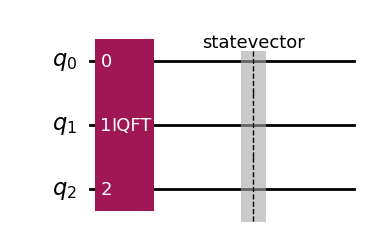

In [165]:
def QFT_dagger_circuit(n):
    qc_QFT_dagger = QuantumCircuit(n)
    qc_QFT_dagger.append(QFT(n).inverse(), range(n))
    return qc_QFT_dagger

qc_QFT_dagger = QFT_dagger_circuit(n)
qc_QFT_dagger.save_statevector()
qc_QFT_dagger.draw('mpl')

In [166]:
res = simulator.run(transpile(qc_QFT_dagger,simulator)).result()
psi_dagger = res.get_statevector()
psi_dagger.draw('latex', prefix='{\\ket{\\psi} = }')

<IPython.core.display.Latex object>

In [167]:
IQFT_matrix = qi.Operator(QFT(n).inverse())
print(IQFT_matrix.data)

[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          2.50000000e-01-0.25j
   2.16489014e-17-0.35355339j -2.50000000e-01-0.25j
  -3.53553391e-01+0.j         -2.50000000e-01+0.25j
  -2.16489014e-17+0.35355339j  2.50000000e-01+0.25j      ]
 [ 3.53553391e-01+0.j          2.16489014e-17-0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17+0.35355339j
   3.53553391e-01+0.j          2.16489014e-17-0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17+0.35355339j]
 [ 3.53553391e-01+0.j         -2.50000000e-01-0.25j
  -2.16489014e-17+0.35355339j  2.50000000e-01-0.25j
  -3.53553391e-01+0.j          2.50000000e-01+0.25j
   2.16489014e-17-0.35355339j -2.50000000e-01+0.25j      ]
 [ 3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j       

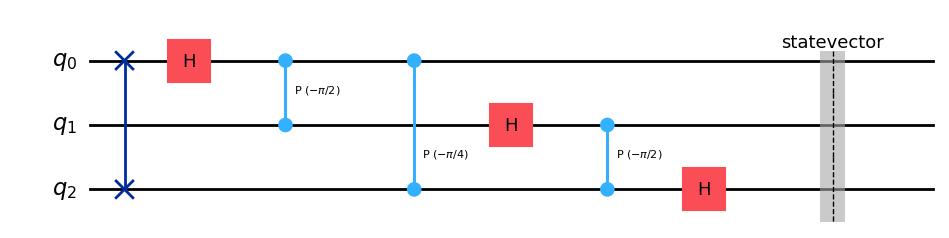

In [168]:
def IQFT_custom(n):
    qc_IQFT_custom = QuantumCircuit(n, name='IQFT')
    for i in range(n//2):
        qc_IQFT_custom.swap(i,n-i-1)

    for i in range(n):
        qc_IQFT_custom.h(i)
        for j in range(i+1,n):
            qc_IQFT_custom.cp(-np.pi/2**(j-i),j,i)



    return qc_IQFT_custom

qc_IQFT_custom = IQFT_custom(n)

qc_IQFT_custom.save_statevector()
qc_IQFT_custom.draw('mpl', filename='../images/iqft_custom.png')

In [169]:
result = simulator.run(transpile(qc_IQFT_custom,simulator)).result()
psi_iqft_custom = result.get_statevector()
psi_iqft_custom.draw('latex', prefix='{\\ket{\\psi} = }')

<IPython.core.display.Latex object>

In [170]:
IQFT_custom_matrix = qi.Operator(IQFT_custom(n))
print(IQFT_custom_matrix.data)

[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          2.50000000e-01-0.25j
   2.16489014e-17-0.35355339j -2.50000000e-01-0.25j
  -3.53553391e-01+0.j         -2.50000000e-01+0.25j
  -2.16489014e-17+0.35355339j  2.50000000e-01+0.25j      ]
 [ 3.53553391e-01+0.j          2.16489014e-17-0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17+0.35355339j
   3.53553391e-01+0.j          2.16489014e-17-0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17+0.35355339j]
 [ 3.53553391e-01+0.j         -2.50000000e-01-0.25j
  -2.16489014e-17+0.35355339j  2.50000000e-01-0.25j
  -3.53553391e-01+0.j          2.50000000e-01+0.25j
   2.16489014e-17-0.35355339j -2.50000000e-01+0.25j      ]
 [ 3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j       